### 목표 : 당노병 예측 모델 구현
- 데이터 : scikit-learn dataset
- 피 쳐 : 10
- 타 겟 : 정수값

(1) 모듈 로딩 및 데이터 준비

In [517]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [518]:
## 데이터 로딩
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [519]:
featureArray = diabetes.data
targetArray = diabetes.target

feature_names = diabetes.feature_names

In [520]:
featureArray.shape, targetArray.shape

((442, 10), (442,))

In [521]:
featureDF = pd.DataFrame(featureArray, columns=feature_names)
featureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [522]:
targetSR = pd.Series(targetArray)
targetSR

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [523]:
featureDF.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


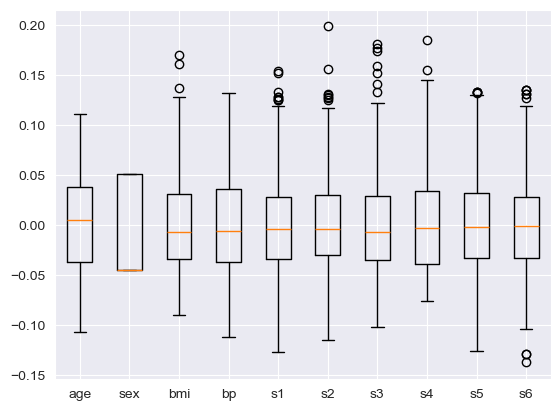

In [524]:
plt.boxplot(featureDF)
plt.xticks(range(1,11), featureDF.columns)
plt.show()

In [525]:
featureDF.duplicated().sum()

0

In [526]:
# 중복값 제거
# dup_row = featureDF[featureDF.duplicated()].index
# featureDF.drop_duplicates(inplace=True)
# featureDF.reset_index(inplace = True,drop = True)
# targetSR.drop(dup_row, inplace=True)
# targetSR.reset_index(inplace = True,drop = True)
# featureDF.duplicated().sum()

In [527]:
# # 이상치 제거 - 혹시나 먼저 제거하면 상관계수 높아질까 해서 제거 먼저 했는데 더 낮아짐 ㅜㅜㅜㅜ아
# def outliers(data):
#     drop_row = []
#     data_list = data.tolist() 
#     q1,q3 = np.percentile(data,[25,75])
#     iqr = q3 - q1
#     upper_bound = q3 + 1.5*iqr
#     lower_bound = q1 - 1.5*iqr
#     for i in range(len(data_list)):
#         if data_list[i] >= upper_bound or data_list[i] <= lower_bound:
#             drop_row.append(i)
#     return drop_row
# 
# drop_row = []
# for i in featureDF.columns:
#     drop_row.append(outliers(featureDF[i]))
#     
# drop_row = [i for sublist in drop_row for i in sublist]
# 
# drop_set = set()
# for i in drop_row:
#     drop_set.add(i)
# drop_set

In [528]:
for c in featureDF.columns:
    print(f"{c} : {np.corrcoef(featureDF[c], targetSR)[0,1]}")
# bmi, s5, bp, s4 

age : 0.1878887507189199
sex : 0.04306199845160533
bmi : 0.5864501344746885
bp : 0.4414817585625709
s1 : 0.21202248101455073
s2 : 0.17405358696874265
s3 : -0.3947892506709185
s4 : 0.4304528847447728
s5 : 0.5658825924427437
s6 : 0.38248348424858103


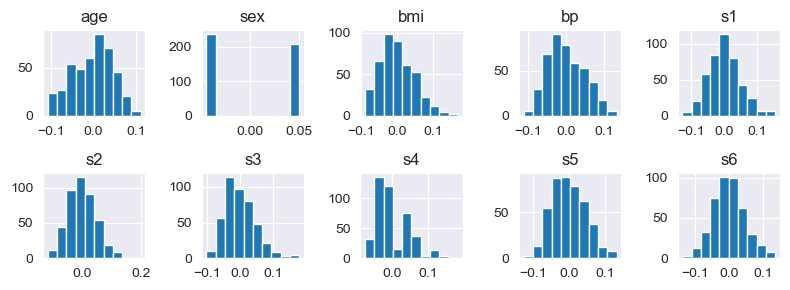

In [529]:
plt.figure(figsize=(8,3))
n = 1
for i in featureDF.columns:
    plt.subplot(2,5,n)
    plt.hist(featureDF[i])
    plt.title(f'{i}')
    plt.tight_layout()
    n+=1

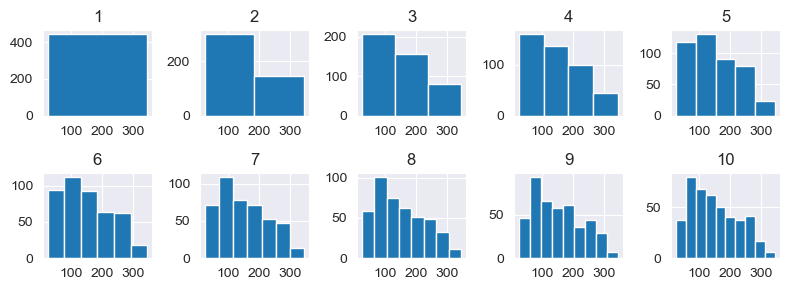

In [530]:
plt.figure(figsize=(8,3))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.hist(targetSR, bins = i)
    plt.title(f"{i}")
    plt.tight_layout()
# 범주화하면 분류 되자나....ㅜㅜ

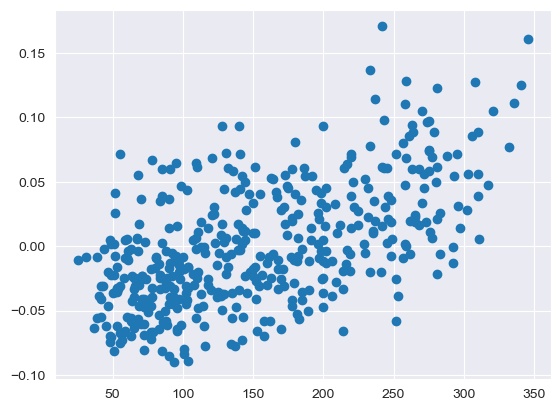

In [531]:
plt.scatter(targetSR, featureDF['bmi'])

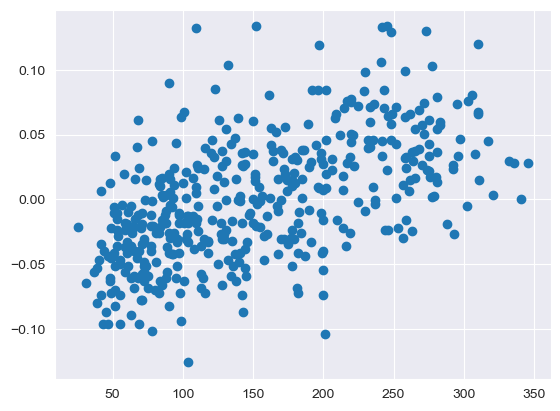

In [532]:
plt.scatter(targetSR, featureDF['s5'])

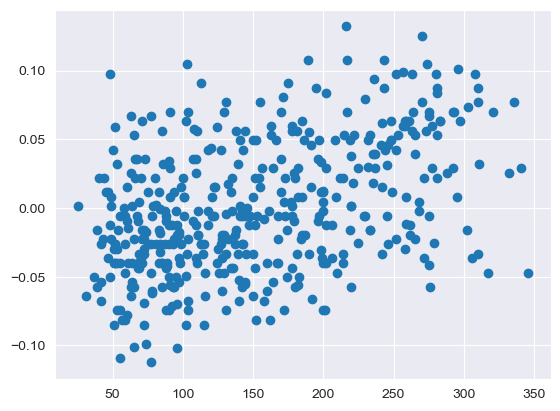

In [533]:
plt.scatter(targetSR, featureDF['bp']) # 너무 퍼져 있어서 제외 # 하려다가 다시 추가 # 했는데 더 낮아져서 제외

([<matplotlib.axis.XTick at 0x1b856fbbb80>,
 [Text(1, 0, 'bmi'), Text(2, 0, 's5')])

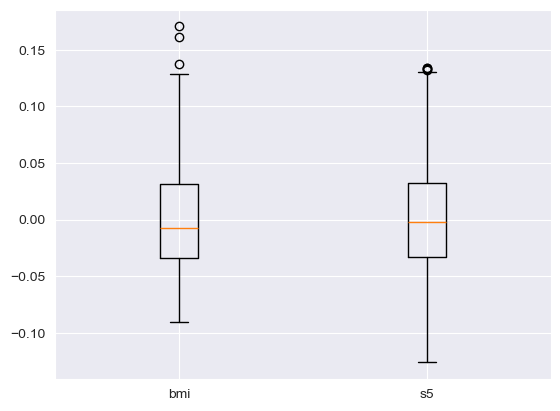

In [534]:
plt.boxplot([featureDF['bmi'],featureDF['s5']]) # 이상치 존재
plt.xticks([1,2],['bmi','s5'])

In [535]:
featureDF = featureDF[['bmi', 's5']]
featureDF.describe()

,bmi,s5
count,4.420000e+02,4.420000e+02
mean,-2.245564e-16,9.293722e-17
std,4.761905e-02,4.761905e-02
min,-9.027530e-02,-1.260971e-01
25%,-3.422907e-02,-3.324559e-02
50%,-7.283766e-03,-1.947171e-03
75%,3.124802e-02,3.243232e-02
max,1.705552e-01,1.335973e-01


In [536]:
def outliers(data):
    drop_row = []
    data_list = data.tolist() 
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    for i in range(len(data_list)):
        if data_list[i] >= upper_bound or data_list[i] <= lower_bound:
            drop_row.append(i)
    return drop_row


In [537]:
# 이상치 제거

# bmi
drop_bmi=outliers(featureDF['bmi'])

# s5
drop_s5 = outliers(featureDF['s5'])

        
drop_row = list(set(drop_bmi+drop_s5))

featureDF.drop(drop_row, inplace = True)
featureDF.reset_index(inplace = True,drop = True)
targetSR.drop(drop_row, inplace=True)
targetSR.reset_index(inplace = True,drop = True)

([<matplotlib.axis.XTick at 0x1b8585bd160>,
 [Text(1, 0, 'bmi'), Text(2, 0, 's5')])

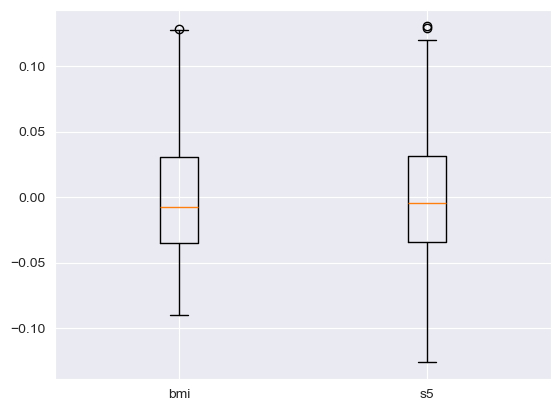

In [538]:
# 이상치 제거 확인
plt.boxplot([featureDF['bmi'],featureDF['s5']])
plt.xticks([1,2],['bmi','s5'])

In [539]:
# 이미 정규화 되어 있는 데이터
x_train,x_test,y_train,y_test = train_test_split(featureDF,targetSR,test_size=0.3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(featureDF,targetSR,test_size=0.3)

In [540]:
x_train.shape,y_train.shape

((304, 2), (304,))

In [541]:
max_k = x_train.shape[0]

test_scoreList = []
train_scoreList = []

for k in range(1, max_k+1):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    
    train_scoreList.append(model.score(x_train, y_train))
    test_scoreList.append(model.score(x_test, y_test))
max_idx = test_scoreList.index(max(test_scoreList))+1
K = max_idx

print(f'max_score : {max(test_scoreList)}')
print(f'k value : {max_idx}')

max_score : 0.4687450938875902
k value : 19


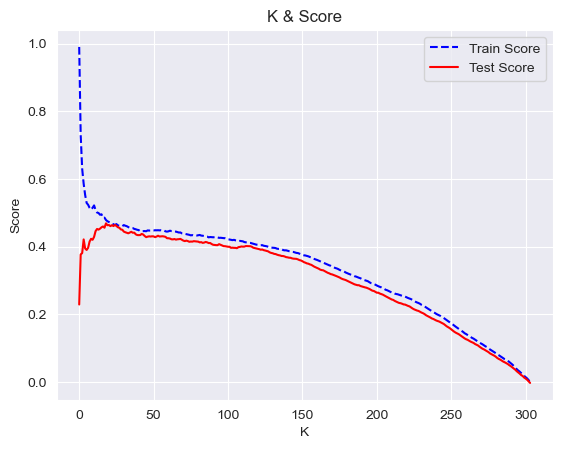

In [542]:
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

In [543]:
for wei in ['uniform', 'distance']:
    for al in ['ball_tree','kd_tree','brute','auto']:
        model = KNeighborsRegressor(n_neighbors=K, weights=wei, algorithm=al)
        model.fit(x_train, y_train)
        train_score = model.score(x_train,y_train) 
        test_score = model.score(x_test,y_test)
        print(f'weight = {wei} & algorithm = {al} => train_score : {train_score} test_score : {test_score}')
# 큰 차이 없음. 파라미터 설정하니까 오히려 과대적합 발생

weight = uniform & algorithm = ball_tree => train_score : 0.4785297005159309 test_score : 0.4687450938875902
weight = uniform & algorithm = kd_tree => train_score : 0.4785916682486323 test_score : 0.4687450938875902
weight = uniform & algorithm = brute => train_score : 0.4792497037895527 test_score : 0.46837908229309855
weight = uniform & algorithm = auto => train_score : 0.4785916682486323 test_score : 0.4687450938875902
weight = distance & algorithm = ball_tree => train_score : 0.9950600029172799 test_score : 0.4496169337502398
weight = distance & algorithm = kd_tree => train_score : 0.9950600029172799 test_score : 0.4496169337502398
weight = distance & algorithm = brute => train_score : 0.9950600029171471 test_score : 0.44939614330769073
weight = distance & algorithm = auto => train_score : 0.9950600029172799 test_score : 0.4496169337502398


In [544]:
model = KNeighborsRegressor(n_neighbors=K)
model.fit(x_train, y_train)
train_score = model.score(x_train,y_train) 
test_score = model.score(x_test,y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.4785916682486323 test_score : 0.4687450938875902


In [545]:
# model = LinearRegression()
# model.fit(x_train, y_train)
# train_score = model.score(x_train,y_train) 
# test_score = model.score(x_test,y_test)
# train_score, test_score

성능검사

In [546]:
y_pre = model.predict(x_test)

In [547]:
r2 = r2_score(y_test,y_pre)
r2

0.4687450938875902

In [548]:
rmse = mean_squared_error(y_test, y_pre, squared=False)
rmse

59.647482646291344

In [549]:
mse = mean_squared_error(y_test, y_pre)
mse

3557.822186039627

In [550]:
mae = mean_absolute_error(y_test,y_pre)
mae

46.96544797107272

In [551]:
print(f'''
[모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\n
''')


[모델 설명도]
R2 : 0.4687450938875902
[에러]
MAE : 46.96544797107272
MSE : 3557.822186039627
RMSE : 59.647482646291344
